### Load the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import os
import sys
#  Set current path
sys.path.append(os.path.abspath('.'))

In [2]:
pwd()

'C:\\Users\\Dell 990\\Desktop\\MDSI\\SINA'

### Load Data

In [3]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline


#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline


from bs4 import BeautifulSoup
import urllib

tweet_df = pd.read_csv('C:\\Users\\Dell 990\\Desktop\\MDSI\\SINA\\vaccination_tweets.csv' )

#### Perform Data Cleansing of Tweet text

In [4]:
# Regular Expression Lib
import re

tweet_df = tweet_df[['text']]
tweet_df_copy = tweet_df.copy()

## Remove the http url from the text , replace by space
tweet_df_copy["tweet_text_cleaned"] = tweet_df_copy['text'].map(lambda x:  re.sub(r'\bhttps?:\/\/.*[\r\n]*', '', x))

## Remove the (, \ .? !) from the text , replace by space
tweet_df_copy["tweet_text_cleaned"] = tweet_df_copy['tweet_text_cleaned'].map(lambda x: re.sub('[,\.!?]', '', x))

## Convert all the text to lower Case
tweet_df_copy['tweet_text_cleaned'] = tweet_df_copy['tweet_text_cleaned'].map(lambda x: x.lower())

## Join all string    
all_joined_string = ','.join(list(tweet_df_copy['tweet_text_cleaned'].values))

In [5]:
mask = np.array(Image.open('C:\\Users\\Dell 990\\Desktop\\MDSI\\SINA\\twitter_mask.png'))

In [6]:
color= ImageColorGenerator(mask)

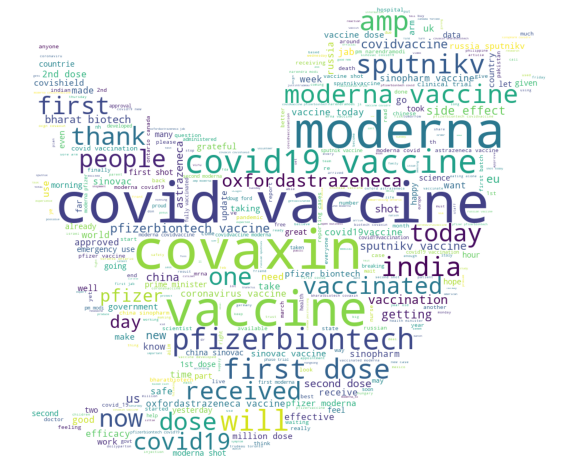

In [9]:
plt.figure(figsize = (10,10))

# Use the original STOPWORD library
stopwords = set(STOPWORDS)
stopwords.update(["still","say","said","see","got", "says"])

wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=100, max_words=400,mask=mask, width =2000, height = 2000).generate(all_joined_string)#
plt.imshow(wordcloud_spam)
plt.axis("off")
plt.show()

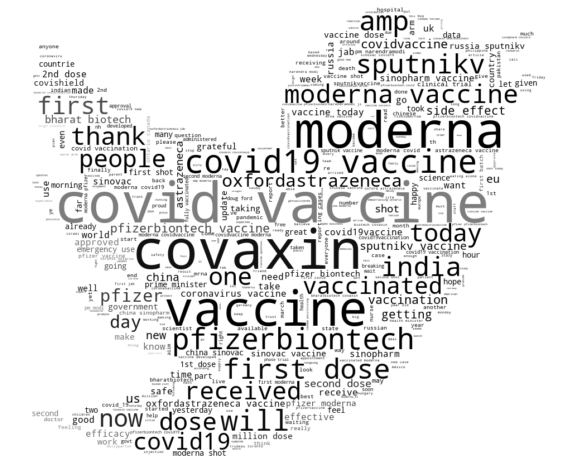

In [10]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_spam.recolor(color_func=color),interpolation="bilinear")
plt.axis("off")
plt.show()